In [ ]:
print("hello World!")

hello World!


Import files from Google Drive (Juan)

In [ ]:
from google.colab import drive

drive.mount('/content/drive',force_remount=True)

import sys
sys.path.append('drive/MyDrive/GeoPandaTest')


Mounted at /content/drive


Import files from Google Drive (Gustavo)

In [2]:
from google.colab import drive

drive.mount('/content/drive',force_remount=True)

import sys
sys.path.append('drive/MyDrive/GeoPandaTest')

Mounted at /content/drive


Install libraries

In [ ]:
!pip install h3pandas

     |████████████████████████████████| 73 kB 1.1 MB/s 
     |████████████████████████████████| 793 kB 6.7 MB/s 
  Created wheel for h3pandas: filename=h3pandas-0.2.2-py3-none-any.whl size=17058 sha256=ea5470a8b3ecb3adf40df25039955307d6cdefbce4e34d98650573f232cc9031
  Stored in directory: /root/.cache/pip/wheels/f9/be/d1/257bdc23c924093aa650a00f74dbb69482d08983b1e33209df
Successfully built h3pandas


# Import and run Preprocessing Code

In [ ]:
import pandas as pd
from GridSystem import PuertoRicoGISCode
import geopandas as gpd
from RoadsPR import HexagonData
from Preprocessing import datecolumns
from redesigned import grouping
from ClusterTest import Clusters
from solapado import overlap
import gc

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.0-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Loading files...
Creating Hexagonal Grid...
Ignore warnings...
/content/drive/MyDrive/GeoPandaTest/Output/
                                     ride_id  ...                    geometry
0       f380efb8-d06e-46a1-a8d7-c8fd6fa44f41  ...  POINT (-67.14328 18.20365)
1       774d4628-539a-49c4-b9f5-e113a14ceaff  ...  POINT (-67.14033 18.21090)
2       b2e54f43-5fff-45f5-bcf2-08d2b59d4273  ...  POINT (-67.14496 18.21432)
3       16b58a1b-2eec-453e-96cb-3e693df376ac  ...  POINT (-67.14764 18.21569)
4       d6bc81cb-1f08-4521-b5fa-d0f90132c50d  ...  POINT (-67.14037 18.20834)
...                                      ...  ...                         ...
131820  c3b6fe23-9834-48a4-bfe9-924302b61be4  ...  POINT (-67.14179 18.19907)
131821  62643188-548d-41fe-9607-5b46ab6dcea8  ...  POINT (-67.14133 18.19885)
131822  17414038-0d96-4f2a-a013-7c33e0951598  ...  POINT (-67.14162 18.19893)
131823  9c8edcf8-bfab-40b4-a017-70491d2e19a6  ...  POINT (-67.14141 18.19897)
131824  22700108-c8eb-467f-9a43-755

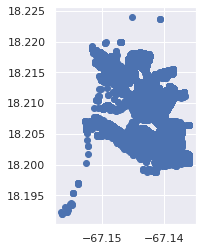

drive/MyDrive/GeoPandaTest/GridSystem.py:280: RuntimeWarning: divide by zero encountered in true_divide
  circums = a * b * c / (4.0 * areas)


City:  Mayagüez


drive/MyDrive/GeoPandaTest/GridSystem.py:233: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  self.joined = gpd.clip(self.grid, self.df_city)


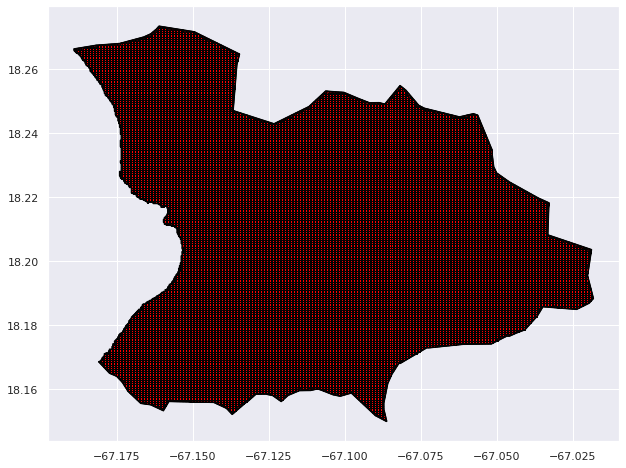

                       lng        lat
h3_10                                
8a4cc54ab637fff -67.135650  18.205133
8a4cc54ab627fff -67.135156  18.205133
8a4cc54ab627fff -67.135156  18.204450
8a4cc54ab637fff -67.135650  18.204450
8a4cc54ab637fff -67.135650  18.205133
...                    ...        ...
8a4cc54aa84ffff -67.143064  18.224953
8a4cc54aab37fff -67.142569  18.224953
8a4cc54aab17fff -67.142569  18.224270
8a4cc54aab17fff -67.143064  18.224270
8a4cc54aa84ffff -67.143064  18.224953

[5764 rows x 2 columns]


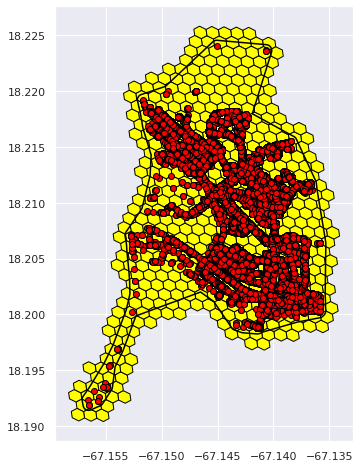

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
drive/MyDrive/GeoPandaTest/GridSystem.py:588: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  points_in_square = gpd.sjoin(self.points, invd_grid_square, op='within')
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
drive/MyDrive/GeoPandaTest/GridSystem.py:588: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right ge

Assigning zones to all rides...
Unnamed: 0 0
dt 0
ride_id 0
bird_id 0
ride_cost 1
start_time 0
end_time 0
start_lat 0
start_long 0
end_lat 0
end_long 0
user_id 0
battery_used 2070
day 0
day_number 0
month 0
year 0
start_time_scalar 0
end_time_scalar 0
origin_zone 0
destination_zone 0
new_start_lat 0
new_start_long 0
new_end_lat 0
new_end_long 0
rebalanced 0
speed 0
target 0


In [ ]:
print("Loading files...")
# Step 1
filename = '/content/drive/MyDrive/GeoPandaTest/Data/processed_ride_data_dic_24.xlsx'
data = pd.read_excel(filename)
puertorico = gpd.read_file(r'/content/drive/MyDrive/GeoPandaTest/Shapefiles/pri_admbnda_adm1_2019.shp')
roads = gpd.read_file(r'/content/drive/MyDrive/GeoPandaTest/PRRoads/hotosm_pri_roads_lines.shp')
# Step 2
print("Creating Hexagonal Grid...")
print("Ignore warnings...")
GeoPR = PuertoRicoGISCode(puertorico,roads,index=49)
HexZones = GeoPR.ZoneIndicator(reso=10,show=True,data=data,output="/content/drive/MyDrive/GeoPandaTest/Output/")
# Step 3


print("Assigning zones to all rides...")
NewData = HexagonData(data=data, zone=HexZones)
NewDataDF = NewData.mainOperation(output='/content/drive/MyDrive/GeoPandaTest/Output/Ride_data_with_hex.csv')


# Garbage collecting unused variables
del HexZones
del GeoPR
del puertorico
del roads

gc.collect()
# Step 4

print("Create time interval")
# dates = datecolumns(step_interval=5) # 5 minutes
dates = datecolumns(data=NewDataDF,step_interval=5) # 5 minutes
datesDF = dates.intervalize("/content/drive/MyDrive/GeoPandaTest/Output/PreprocessedIntervals.csv")


# Step 4b
print("Adding Clusters")
cluster = Clusters(datesDF,12)
dataClu= cluster.createCluster("/content/drive/MyDrive/GeoPandaTest/Output/PrepoCluster.csv")


# Step 5
print("Transforming data aggregation...")
prefinalized = grouping(parent=True,data=dataClu)
grData = prefinalized.returnDF("/content/drive/MyDrive/GeoPandaTest/Output/PreprocessedPreFinal.csv")

print("Creating Overlap Data...")

solapado = overlap(grData)
finalized= solapado.returnDF("/content/drive/MyDrive/GeoPandaTest/Output/PreprocessedOverlapped.csv")
# TODO Dummies
print("...Done")

# If no changes were done to the preprocessing, here is the finalized dataset.

Only if there is no changes to the preprocessing code, you can use this to go straight to the data

In [ ]:
finalized = pd.read_csv('./Output/PreprocessedOverlapped.csv')

NameError: ignored

# TODO dummies

In [ ]:
# create dummyfying code or add it to preprocessing section

# Machine Learning - Production and Attraction

In [ ]:
import matplotlib.pyplot as plt
from datetime import date
from sklearn.model_selection import train_test_split
import xgboost as xgb

from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor


In [ ]:
to_drop = finalized[['Production','Attraction']]

finaldf = finalized.to_drop(['dt'],axis='columns')

Xp = finaldf.to_drop(to_drop,axis='columns')

# XGBoost

In [ ]:
for i in range(5):

  # X columns
  X = Xp
  # y column
  y = feat_partial2[to_drop[i]]

  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=False)

  # Define parameters as a disctionary
  # params = {'n_estimators': n, 'max_depth': md, 'min_samples_split': mss, 'learning_rate': lr, 'loss': 'ls'}
  # Apply gradient boosting regression to train data
  model = xgb.XGBRegressor()
  model.fit(X_train, y_train)

  y_predxg = model.predict(X_test)


  score = model.score(X_test,y_test)
  print("XGBoost Scores for: ")

  print(to_drop[i])
  print(score)
  print(mean_squared_error(y_test,y_predxg))
  print(mean_absolute_error(y_test,y_predxg))

  print("Scatter Plot for"+ str(to_drop[i]))
  plt.scatter(y_predxg,y_test)
  print("Another Plot for"+ str(to_drop[i]))
  plt.plot(range(len(y_test))[500:600],y_test[500:600])
  plt.plot(range(len(y_predxg))[500:600],y_predxg[500:600])
  print("Last Plot for"+ str(to_drop[i]))
  plt.plot(range(len(y_predxg)),y_predxg)

# Bayesian Ridge

In [ ]:
for i in range(6):

  # X columns
  X = x_p
  # y column
  y = feat_partial2[to_drop[i]]

  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=False)

  # Define parameters as a disctionary
  # params = {'n_estimators': n, 'max_depth': md, 'min_samples_split': mss, 'learning_rate': lr, 'loss': 'ls'}
  # Apply gradient boosting regression to train data
  model = BayesianRidge()
  model.fit(X_train, y_train)

  y_predxg = model.predict(X_test)

  score = model.score(X_test,y_test)
  print("Bayesian Ridge Scores for: ")

  print(to_drop[i])
  print(score)
  print(mean_squared_error(y_test,y_predxg))
  print(mean_absolute_error(y_test,y_predxg))

  print("Scatter Plot for"+ str(to_drop[i]))
  plt.scatter(y_predxg,y_test)
  print("Another Plot for"+ str(to_drop[i]))
  plt.plot(range(len(y_test))[500:600],y_test[500:600])
  plt.plot(range(len(y_predxg))[500:600],y_predxg[500:600])
  print("Last Plot for"+ str(to_drop[i]))
  plt.plot(range(len(y_predxg)),y_predxg)


# Random Forrest

In [ ]:
for i in range(6):

  # X columns
  X = x_p
  # y column
  y = feat_partial2[to_drop[i]]

  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=False)

  # Define parameters as a disctionary
  # params = {'n_estimators': n, 'max_depth': md, 'min_samples_split': mss, 'learning_rate': lr, 'loss': 'ls'}
  # Apply gradient boosting regression to train data
  model = RandomForestRegressor()
  model.fit(X_train, y_train)

  y_predxg = model.predict(X_test)

  score = model.score(X_test,y_test)
  print("Random Forest Regressor Scores for: ")

  print(to_drop[i])
  print(score)
  print(mean_squared_error(y_test,y_predxg))
  print(mean_absolute_error(y_test,y_predxg))

  print("Scatter Plot for"+ str(to_drop[i]))
  plt.scatter(y_predxg,y_test)
  print("Another Plot for"+ str(to_drop[i]))
  plt.plot(range(len(y_test))[500:600],y_test[500:600])
  plt.plot(range(len(y_predxg))[500:600],y_predxg[500:600])
  print("Last Plot for"+ str(to_drop[i]))
  plt.plot(range(len(y_predxg)),y_predxg)

# Linear regression V1


In [ ]:
for i in range(6):

  # X columns
  X = x_p
  # y column
  y = feat_partial2[to_drop[i]]

  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=False)

  # Define parameters as a disctionary
  # params = {'n_estimators': n, 'max_depth': md, 'min_samples_split': mss, 'learning_rate': lr, 'loss': 'ls'}
  # Apply gradient boosting regression to train data
  model = LinearRegression()
  model.fit(X_train, y_train)

  y_predxg = model.predict(X_test)

  score = model.score(X_test,y_test)
  print("Linear Regression Scores for: ")

  print(to_drop[i])
  print(score)
  print(mean_squared_error(y_test,y_predxg))
  print(mean_absolute_error(y_test,y_predxg))

  print("Scatter Plot for"+ str(to_drop[i]))
  plt.scatter(y_predxg,y_test)
  print("Another Plot for"+ str(to_drop[i]))
  plt.plot(range(len(y_test))[500:600],y_test[500:600])
  plt.plot(range(len(y_predxg))[500:600],y_predxg[500:600])
  print("Last Plot for"+ str(to_drop[i]))
  plt.plot(range(len(y_predxg)),y_predxg)

# Gradient Boosting

In [ ]:
for i in range(6):

  # X columns
  X = x_p
  # y column
  y = feat_partial2[to_drop[i]]

  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=False)

  # Define parameters as a disctionary
  # params = {'n_estimators': n, 'max_depth': md, 'min_samples_split': mss, 'learning_rate': lr, 'loss': 'ls'}
  # Apply gradient boosting regression to train data
  model = GradientBoostingRegressor()
  model.fit(X_train, y_train)

  y_predxg = model.predict(X_test)

  score = model.score(X_test,y_test)
  print("GradientBoostingRegressor Scores for: ")

  print(to_drop[i])
  print(score)
  print(mean_squared_error(y_test,y_predxg))
  print(mean_absolute_error(y_test,y_predxg))

  print("Scatter Plot for"+ str(to_drop[i]))
  plt.scatter(y_predxg,y_test)
  print("Another Plot for"+ str(to_drop[i]))
  plt.plot(range(len(y_test))[500:600],y_test[500:600])
  plt.plot(range(len(y_predxg))[500:600],y_predxg[500:600])
  print("Last Plot for"+ str(to_drop[i]))
  plt.plot(range(len(y_predxg)),y_predxg)

# Multi Layer Perceptron

In [ ]:
for i in range(6):

  # X columns
  X = x_p
  # y column
  y = feat_partial2[to_drop[i]]

  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=False)

  # Define parameters as a disctionary
  # params = {'n_estimators': n, 'max_depth': md, 'min_samples_split': mss, 'learning_rate': lr, 'loss': 'ls'}
  # Apply gradient boosting regression to train data
  model = MLPRegressor()
  model.fit(X_train, y_train)

  y_predxg = model.predict(X_test)

  score = model.score(X_test,y_test)
  print("GradientBoostingRegressor Scores for: ")

  print(to_drop[i])
  print(score)
  print(mean_squared_error(y_test,y_predxg))
  print(mean_absolute_error(y_test,y_predxg))

  print("Scatter Plot for"+ str(to_drop[i]))
  plt.scatter(y_predxg,y_test)
  print("Another Plot for"+ str(to_drop[i]))
  plt.plot(range(len(y_test))[500:600],y_test[500:600])
  plt.plot(range(len(y_predxg))[500:600],y_predxg[500:600])
  print("Last Plot for"+ str(to_drop[i]))
  plt.plot(range(len(y_predxg)),y_predxg)

# Adaboost

In [ ]:
for i in range(6):

  # X columns
  X = x_p
  # y column
  y = feat_partial2[to_drop[i]]

  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=False)

  # Define parameters as a disctionary
  # params = {'n_estimators': n, 'max_depth': md, 'min_samples_split': mss, 'learning_rate': lr, 'loss': 'ls'}
  # Apply gradient boosting regression to train data
  model = AdaBoostRegressor()
  model.fit(X_train, y_train)

  y_predxg = model.predict(X_test)

  score = model.score(X_test,y_test)
  print("GradientBoostingRegressor Scores for: ")

  print(to_drop[i])
  print(score)
  print(mean_squared_error(y_test,y_predxg))
  print(mean_absolute_error(y_test,y_predxg))

  print("Scatter Plot for"+ str(to_drop[i]))
  plt.scatter(y_predxg,y_test)
  print("Another Plot for"+ str(to_drop[i]))
  plt.plot(range(len(y_test))[500:600],y_test[500:600])
  plt.plot(range(len(y_predxg))[500:600],y_predxg[500:600])
  print("Last Plot for"+ str(to_drop[i]))
  plt.plot(range(len(y_predxg)),y_predxg)